Los siguientes datos corresponden al cálculo numérico de una cierta propiedad estadística de la distribución de materia en el universo (el espectro de potencias) $P(k)$ en función del modo de Fourier $k$. Use la derivada numérica para encontrar $d \ln P/d\ln k$ en cada punto. Para estimar el error cometido en esta derivada numérica compare el resultado de la fórmula a tres puntos con el resultado de la fórmula a cinco puntos. Será necesario usar las fórmulas a tres y cinco puntos en los extremos que se encuentran en este mismo notebook.

In [9]:
import numpy as np
import matplotlib.pyplot as plt


datos = np.array([       [5.531683013105e-04,       1.070304113861e+12], 
       [5.910227121702e-04,       1.139622191891e+12], 
       [6.315688849627e-04,       1.213481232452e+12], 
       [6.750065137883e-04,       1.292169597309e+12], 
       [7.215301959429e-04,       1.375954296780e+12], 
       [7.713235180257e-04,       1.465069697719e+12], 
       [8.245525173319e-04,       1.559705507566e+12], 
       [8.813589235833e-04,       1.659994890361e+12], 
       [9.418537183337e-04,       1.766003776663e+12], 
       [1.006111625261e-03,       1.877722471320e+12], 
       [1.074167130425e-03,       1.995060685935e+12], 
       [1.146012510269e-03,       2.117846703996e+12], 
       [1.221598126720e-03,       2.245831037960e+12], 
       [1.300834972303e-03,       2.378694410099e+12], 
       [1.383599172303e-03,       2.516052095865e+12], 
       [1.469737934874e-03,       2.657475892684e+12], 
       [1.559076324033e-03,       2.802524407596e+12], 
       [1.651424225675e-03,       2.950729179407e+12], 
       [1.746582964833e-03,       3.101618970269e+12], 
       [1.844351177716e-03,       3.254730780491e+12], 
       [1.944529704896e-03,       3.409618695392e+12], 
       [2.046925420592e-03,       3.565860320889e+12], 
       [2.151354028418e-03,       3.723061333248e+12], 
       [2.257641930146e-03,       3.880858018481e+12] ])





Se quiere encontrar 
$$ \frac{d(ln(P))}{d(ln(k))} 
$$
y sabemos que el logaritmo de x es: $$\frac {1}{x}$$
Entonces: 

$$ \frac{d(ln(P))}{d(ln(k))} = \frac{k}{P} \frac{dP}{dk}
$$



In [7]:
#se leen los datos de la tabla, por columna
p = datos[:,[0]]
k = datos[:,[1]]
P2 = np.transpose(p, (1, 0))
K2 = np.transpose(k, (1, 0))




# Se definen las derivadas respectivas


def deriv3_datos(fxo, fx2, h):
    return (fx2 - fxo)/(2*h)

def deriv3_borde_datos(fxo, fx1, fx2, h):
    return (-3*fxo + 4*fx1 - fx2)/(2*h)

def deriv_datos(fx, h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i == 0:
            deriv[i] = deriv3_borde_datos(fx[0], fx[1], fx[2], h)
        elif i == n - 1:
            deriv[i] = deriv3_borde_datos(fx[n-1], fx[n-2], fx[n-3], -h)
        else:
            deriv[i] = deriv3_datos(fx[i-1], fx[i+1], h)
    return deriv
    

def deriv5p(fxo, fx1, fx3, fx4, h):
    return (fxo - 8*fx1 + 8*fx3 - fx4)/(12*h)

def deriv5p_extremo(fxo, fx1, fx2, fx3, fx4, h):
    return (-25*fxo + 48*fx1 - 36*fx2 + 16*fx3 - 3*fx4)/(12*h)

def deriv_5_datos(fx, h):
    
    n = len(fx)
    deriv = np.zeros(n)
    for i in range(n):
        if i < 1 :
            deriv[i] = deriv5p_extremo(fx[0], fx[1], fx[2], fx[3], fx[4], h)
        elif i > n - 3:
            deriv[i] = deriv5p_extremo(fx[n-3], fx[n-4], fx[n-5], fx[n-6], fx[n-7], -h)
        else:
            deriv[i] = deriv5p(fx[i-2], fx[i-1], fx[i+1], fx[i+2], h)
    return deriv

m = 1000
deriv3puntosdeP = deriv_datos(p, m)
deriv3puntosdeK = deriv_datos(k, m)
deriv5puntosP = deriv_5_datos(p, m)
deriv5puntosk = deriv_5_datos(k, m)
deriv5puntosP


array([3.65763688e-08, 1.84153340e-07, 4.19590432e-08, 4.49491402e-08,
       4.81293668e-08, 5.14855134e-08, 5.49966435e-08, 5.86351251e-08,
       6.23672500e-08, 6.61544758e-08, 6.99552226e-08, 7.37270519e-08,
       7.74289712e-08, 8.10235783e-08, 8.44787919e-08, 8.77689967e-08,
       9.08755445e-08, 9.37866570e-08, 9.64968530e-08, 9.90060605e-08,
       1.01318573e-07, 1.03441986e-07, 1.03441443e-07, 1.03441443e-07])

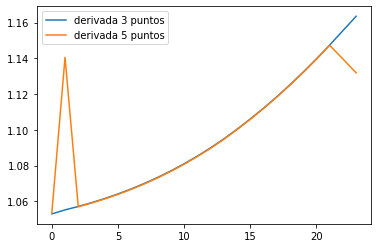

In [14]:
datos3 = (K2/P2)*(deriv3puntosdeP/deriv3puntosdeK)
datos5 = (K2/P2)*(deriv5puntosP/deriv5puntosk)

d3p = np.transpose(datos3, (1, 0))
d5p = np.transpose(datos5, (1, 0))

plt.plot(d3p -p, label = 'derivada 3 puntos')
plt.plot(d5p -p, label = 'derivada 5 puntos')
plt.legend()

#Se grafica la diferencia entre las derivadas.

In [11]:
print('El arreglo con derivada a 3 puntos', d3p)
print('El arreglo con derivada a 5 puntos', d5p)

El arreglo con derivada a 3 puntos [[1.05356428]
 [1.05585044]
 [1.05779873]
 [1.05995141]
 [1.06232455]
 [1.06493435]
 [1.06779716]
 [1.07092935]
 [1.07434727]
 [1.07806689]
 [1.08210331]
 [1.08647009]
 [1.09117817]
 [1.09626381]
 [1.10174904]
 [1.10756023]
 [1.11368225]
 [1.12015684]
 [1.12698012]
 [1.13414734]
 [1.14165323]
 [1.14949172]
 [1.1576559 ]
 [1.16579381]]
El arreglo con derivada a 5 puntos [[1.05392715]
 [1.14111918]
 [1.05761276]
 [1.05975382]
 [1.06211604]
 [1.06471592]
 [1.06757017]
 [1.07069542]
 [1.07410831]
 [1.07782507]
 [1.08186097]
 [1.08622977]
 [1.09093751]
 [1.0960263 ]
 [1.10153267]
 [1.10735807]
 [1.11348477]
 [1.1199721 ]
 [1.12680857]
 [1.13398912]
 [1.14150832]
 [1.14935996]
 [1.14177978]
 [1.13414017]]


Se puede ver en el gráfico y en los arreglos la variación en los extremos, lo cual puede suponer un mayor error al calcular la derivada. Sin embargo, en los valores del medio son más similares, acercándose a cero la diferencia entre estos.



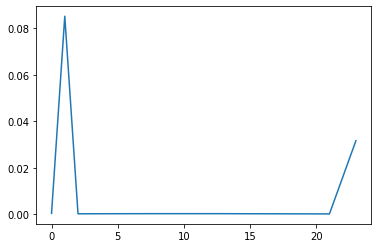

In [26]:
error = abs(d3p-d5p)
plt.plot(error)